# Canada used cars prices

## Importing libraries and loading raw data of Canada

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('ca-dealers-used.csv',low_memory=False)
df.head()

,id,vin,price,miles,stock_no,year,make,model,trim,body_type,...,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
0,b39ea795-eca9,19UNC1B01HY800062,179999.0,9966.0,V-P4139,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,edmundston honda,475 Rue Victoria,Edmundston,NB,E3V 2K7
1,026cb5b1-6e3e,19UNC1B02HY800023,179995.0,5988.0,PPAP70374,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,garage daniel lessard,2795 Route-du-prsident-kennedy,Notre-dame-des-pins,QC,G0M 1K0
2,5cd5d5b2-5cc2,19UNC1B02HY800071,168528.0,24242.0,B21085,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,lougheed acura,1388 Lougheed Highway,Coquitlam,BC,V3K 6S4
3,b32473ed-5922,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,drive autogroup,1305 Parkway Suite 600,Pickering,ON,L1V 3P2
4,ac40c9fc-0676,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,acura pickering,575 Kingston Road,Pickering,ON,L1V 3N7


## Preprocessing

In [3]:
#Exploring the descriptive statistics of the variables
df.describe(include='all')

,id,vin,price,miles,stock_no,year,make,model,trim,body_type,...,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
count,393603,393603,3.584860e+05,3.665900e+05,365929,393586.000000,393603,388809,354824,359578,...,354608,357922,322790,320950.000000,320439,391371,385674,385829,385767,385834
unique,393603,226691,NaN,NaN,191483,NaN,57,955,1607,21,...,3,2,26,NaN,3,5160,4959,777,16,3620
top,98d78352-125c,1LN6L9NC8K5603899,NaN,NaN,-,NaN,Ford,Civic,SE,SUV,...,4WD,Automatic,Unleaded,NaN,I,autocanada,200 15511 123 Ave Nw,Edmonton,ON,T5V 0C3
freq,1,21,NaN,NaN,971,NaN,39768,10528,26666,159414,...,209222,328632,222523,NaN,201510,8987,8987,18615,126200,8987
mean,NaN,NaN,2.601902e+04,7.566339e+04,NaN,2016.414829,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.785073,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.064007e+04,5.775442e+04,NaN,3.345400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.236639,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,1981.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.490000e+04,3.491375e+04,NaN,2015.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.190000e+04,6.232800e+04,NaN,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.400000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.199500e+04,1.032830e+05,NaN,2019.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#determine variable of interest
df_v2 = df.drop(['id','stock_no','seller_name','street','city','state','zip','body_type','trim'],axis=1)

df_v2.describe(include='all')

,vin,price,miles,year,make,model,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block
count,393603,3.584860e+05,3.665900e+05,393586.000000,393603,388809,355365,354608,357922,322790,320950.000000,320439
unique,226691,NaN,NaN,NaN,57,955,2,3,2,26,NaN,3
top,1LN6L9NC8K5603899,NaN,NaN,NaN,Ford,Civic,Truck,4WD,Automatic,Unleaded,NaN,I
freq,21,NaN,NaN,NaN,39768,10528,211439,209222,328632,222523,NaN,201510
mean,NaN,2.601902e+04,7.566339e+04,2016.414829,NaN,NaN,NaN,NaN,NaN,NaN,2.785073,NaN
std,NaN,2.064007e+04,5.775442e+04,3.345400,NaN,NaN,NaN,NaN,NaN,NaN,1.236639,NaN
min,NaN,0.000000e+00,0.000000e+00,1981.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN
25%,NaN,1.490000e+04,3.491375e+04,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,2.190000e+04,6.232800e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.400000,NaN
75%,NaN,3.199500e+04,1.032830e+05,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN


In [5]:
fuel= {
    'Unleaded':'Gas',
    'Premium Unleaded':'Gas',
    'E85 / Unleaded':'Gas',
    'Diesel':'Diesel',
    'Electric / Unleaded':'Hybrid',
    'Electric': 'Electric',
    'Electric / Premium Unleaded':'Hybrid',
    'E85 / Premium Unleaded':'Gas',
    'Unleaded / Unleaded':'Gas',
    'E85':'Gas',
    'Biodiesel':'Diesel',
    'Premium Unleaded / Unleaded':'Gas',
    'Unleaded / E85':'Gas',
    'E85 / Unleaded; Unleaded / Unleaded':'Gas',
    'Electric / Hydrogen':'Hybrid',
    'Compressed Natural Gas':'Gas',
    'E85 / Unleaded; Unleaded':'Gas',
    'Electric / E85':'Hybrid',
    'Compressed Natural Gas / Lpg':'Gas',
    'Premium Unleaded; Unleaded':'Gas',
    'Premium Unleaded / Natural Gas':'Gas',
    'Compressed Natural Gas; Unleaded':'Gas',
    'Diesel / Premium Unleaded':'Diesel',
    'Unleaded / Electric':'Hybrid',
    'Compressed Natural Gas / Unleaded':'Gas',
    'Unleaded / Premium Unleaded':'Gas'}

#make new column 'fuel' contains only 4 fuel types
df_v2['fuel'] = df_v2['fuel_type'].replace(fuel)

#drop the 'fuel_type' column
df_v3 = df_v2.drop(['fuel_type'],axis=1)

df_v3.fuel.value_counts()

Gas         305340
Diesel        7586
Hybrid        7532
Electric      2332
Name: fuel, dtype: int64

In [6]:
#checking for dupicates 
print('Number of duplicated raws :',df_v3.duplicated().sum())
print('Number of duplicated cars (vin)  :',df_v3.vin.duplicated().sum())

Number of duplicated raws : 147555
Number of duplicated cars (vin)  : 166912


In [7]:
#droping duplicated raws
df_v4 =df_v3.drop_duplicates()

print('Number of duplicated raws :',df_v4.duplicated().sum())
print('Number of duplicated cars (vin)  :',df_v4.vin.duplicated().sum())

Number of duplicated raws : 0
Number of duplicated cars (vin)  : 19357


In [8]:
#checking for Null values
df_v4.isna().sum()

vin                 0
price           28567
miles           16754
year               14
make                0
model            3075
vehicle_type    24718
drivetrain      28278
transmission    26608
engine_size     49845
engine_block    50278
fuel            48856
dtype: int64

In [9]:
#removing Nulls from price
df_no_p_mv = df_v4[df_v4.price.notnull()]
df_no_p_mv.isna().sum()

vin                 0
price               0
miles           13529
year               12
make                0
model            2577
vehicle_type    21761
drivetrain      23117
transmission    21947
engine_size     42606
engine_block    42932
fuel            41614
dtype: int64

In [10]:
#droping duplicated vin raws
df_clean =df_no_p_mv.drop_duplicates(subset = ['vin'] ,keep= 'first').copy()
print('Number of duplicated cars (vin)  :',df_clean.vin.duplicated().sum())

Number of duplicated cars (vin)  : 0


In [11]:
# fill year Null values  with the mode
df_clean.iloc[:,[3]] = df_clean['year'].fillna(value=df_clean['year'].mode()[0])
print('Nulls in Years column :',df_clean['year'].isna().sum())

#grouping by the Years 
gp_by_year = df_clean.groupby(by=['year'])

#fill miles Null values with every year mean
df_clean.iloc[:,[2]] = gp_by_year['miles'].apply(lambda x: x.fillna(x.mean()))
print('Nulls in miles column :',df_clean['miles'].isna().sum())

Nulls in Years column : 0
Nulls in miles column : 0


In [12]:
#grouping by 'make'
gp_by_make = df_clean.groupby(by=['make'])

# filling 'model' nulls with most freq in every car model 
df_clean['model'] = gp_by_make['model'].fillna(value=df_clean['model'].mode()[0])
df_clean.isna().sum()

vin                 0
price               0
miles               0
year                0
make                0
model               0
vehicle_type    20756
drivetrain      22270
transmission    21199
engine_size     40830
engine_block    41151
fuel            39898
dtype: int64

In [13]:
#grouping by 'model'
gp_by_model = df_clean.groupby(by=['model'])

# filling Nulls in 'engine_size' with the mean of each model
df_clean['engine_size'] = gp_by_model['engine_size'].apply(lambda x: x.fillna(x.mean()))

#filling Nulls in the rest of variables with the mode of each model in each varialbe
df_clean['vehicle_type'] = gp_by_model['vehicle_type'].fillna(value=df_clean['vehicle_type'].mode()[0])
df_clean['drivetrain'] = gp_by_model['drivetrain'].fillna(value=df_clean['drivetrain'].mode()[0])
df_clean['transmission'] = gp_by_model['transmission'].fillna(value=df_clean['transmission'].mode()[0])
df_clean['fuel'] = gp_by_model['fuel'].fillna(value=df_clean['fuel'].mode()[0])
df_clean['engine_block'] = gp_by_model['engine_block'].fillna(value=df_clean['engine_block'].mode()[0])



df_clean.isna().sum()

vin                0
price              0
miles              0
year               0
make               0
model              0
vehicle_type       0
drivetrain         0
transmission       0
engine_size     1657
engine_block       0
fuel               0
dtype: int64

In [14]:
# filling the rest of nulls in 'engine_size' with the mean
df_clean['engine_size'] = df_clean['engine_size'].fillna(df_clean['engine_size'].mean())

df_clean.isna().sum()

vin             0
price           0
miles           0
year            0
make            0
model           0
vehicle_type    0
drivetrain      0
transmission    0
engine_size     0
engine_block    0
fuel            0
dtype: int64

In [15]:
#droping unimpotrant variable and keeping only variable of interest 
data = df_clean.drop(['model','vin'],axis=1)
data.reset_index(drop=True)

,price,miles,year,make,vehicle_type,drivetrain,transmission,engine_size,engine_block,fuel
0,179999.0,9966.000000,2017.0,Acura,Car,4WD,Automatic,3.5,V,Hybrid
1,179995.0,5988.000000,2017.0,Acura,Car,4WD,Automatic,3.5,V,Hybrid
2,168528.0,24242.000000,2017.0,Acura,Car,4WD,Automatic,3.5,V,Hybrid
3,220000.0,6637.000000,2020.0,Acura,Car,4WD,Automatic,3.5,V,Hybrid
4,155771.0,18281.000000,2017.0,Acura,Car,4WD,Automatic,3.5,V,Hybrid
...,...,...,...,...,...,...,...,...,...,...
206134,43900.0,68665.000000,2018.0,Mercedes-Benz,Truck,4WD,Automatic,2.0,I,Hybrid
206135,47995.0,22108.000000,2019.0,Mercedes-Benz,Truck,4WD,Automatic,2.0,I,Hybrid
206136,42995.0,55316.000000,2018.0,Mercedes-Benz,Truck,4WD,Automatic,2.0,I,Hybrid
206137,115995.0,19518.399605,2020.0,Porsche,Truck,4WD,Automatic,3.0,V,Hybrid


In [16]:
data.describe(include = 'all')

,price,miles,year,make,vehicle_type,drivetrain,transmission,engine_size,engine_block,fuel
count,2.061390e+05,2.061390e+05,206139.000000,206139,206139,206139,206139,206139.000000,206139,206139
unique,NaN,NaN,NaN,57,2,3,2,NaN,3,4
top,NaN,NaN,NaN,Ford,Truck,4WD,Automatic,NaN,I,Gas
freq,NaN,NaN,NaN,19371,128266,129170,190820,NaN,146185,197027
mean,2.540007e+04,7.770901e+04,2016.237883,NaN,NaN,NaN,NaN,2.694152,NaN,NaN
std,2.123859e+04,5.739070e+04,3.362478,NaN,NaN,NaN,NaN,1.152125,NaN,NaN
min,0.000000e+00,0.000000e+00,1981.000000,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
25%,1.399500e+04,3.700050e+04,2015.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
50%,2.099500e+04,6.559300e+04,2017.000000,NaN,NaN,NaN,NaN,2.400000,NaN,NaN
75%,3.147800e+04,1.078205e+05,2019.000000,NaN,NaN,NaN,NaN,3.500000,NaN,NaN


## Exploring the PDFs and Dealing with outliers

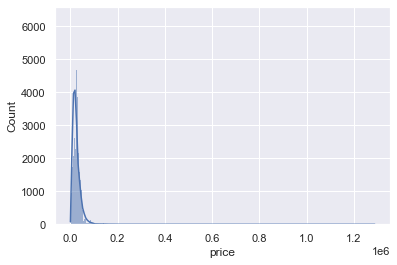

In [17]:
# exploring the PDF for 'price'
sns.histplot(data['price'], kde = True)

plt.show()

In [18]:
# Removing Top 1% of price and zeros
q = data['price'].quantile(0.99)
data_1 = data[(data['price']<q) & ((data['price']!=0)) ]

data_1.describe(include = 'all')

,price,miles,year,make,vehicle_type,drivetrain,transmission,engine_size,engine_block,fuel
count,204071.000000,2.040710e+05,204071.000000,204071,204071,204071,204071,204071.000000,204071,204071
unique,NaN,NaN,NaN,55,2,3,2,NaN,3,4
top,NaN,NaN,NaN,Ford,Truck,4WD,Automatic,NaN,I,Gas
freq,NaN,NaN,NaN,19271,127150,127580,189016,NaN,145530,195328
mean,24175.883825,7.827421e+04,2016.222104,NaN,NaN,NaN,NaN,2.676119,NaN,NaN
std,14393.903192,5.734598e+04,3.349232,NaN,NaN,NaN,NaN,1.135265,NaN,NaN
min,800.000000,0.000000e+00,1981.000000,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
25%,13991.000000,3.722730e+04,2015.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
50%,20934.000000,6.622100e+04,2017.000000,NaN,NaN,NaN,NaN,2.400000,NaN,NaN
75%,30900.000000,1.084325e+05,2019.000000,NaN,NaN,NaN,NaN,3.500000,NaN,NaN


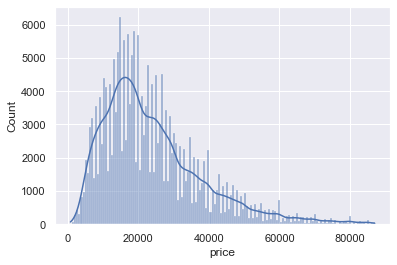

In [19]:
# exploring the PDF for 'price'
sns.histplot(data_1['price'], kde = True)

plt.show()

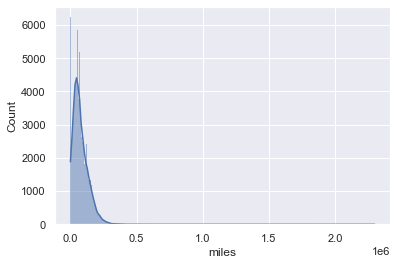

In [20]:
# exploring the PDF for 'miles'
sns.histplot(data['miles'], kde = True)

plt.show()

In [21]:
# Removing Top 1% of 'miles'
q = data_1['miles'].quantile(0.99)
data_2 = data_1[data_1['miles']<q]


data_2.describe(include = 'all')

,price,miles,year,make,vehicle_type,drivetrain,transmission,engine_size,engine_block,fuel
count,202030.000000,202030.000000,202030.000000,202030,202030,202030,202030,202030.000000,202030,202030
unique,NaN,NaN,NaN,55,2,3,2,NaN,3,4
top,NaN,NaN,NaN,Ford,Truck,4WD,Automatic,NaN,I,Gas
freq,NaN,NaN,NaN,18878,125556,126257,187170,NaN,144638,193501
mean,24317.606697,76022.645587,2016.294154,NaN,NaN,NaN,NaN,2.664499,NaN,NaN
std,14374.342249,51895.306650,3.262102,NaN,NaN,NaN,NaN,1.124724,NaN,NaN
min,800.000000,0.000000,1981.000000,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
25%,13995.000000,37227.303325,2015.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
50%,20991.500000,65515.500000,2017.000000,NaN,NaN,NaN,NaN,2.400000,NaN,NaN
75%,30991.000000,106400.000000,2019.000000,NaN,NaN,NaN,NaN,3.500000,NaN,NaN


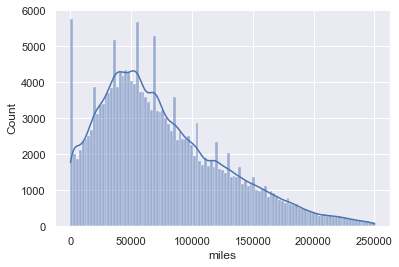

In [22]:
# exploring the PDF for 'miles'
sns.histplot(data_2['miles'], kde = True)

plt.show()

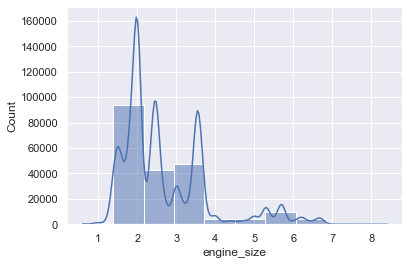

In [23]:
# exploring the PDF for 'engine_size'
sns.histplot(data['engine_size'],bins = 10,kde = True )

plt.show()

In [24]:
# removing every engine_size above 6.5L
data_3 = data_2[data_2['engine_size']<6.5]

data_3.describe(include = 'all')

,price,miles,year,make,vehicle_type,drivetrain,transmission,engine_size,engine_block,fuel
count,200539.000000,200539.000000,200539.000000,200539,200539,200539,200539,200539.000000,200539,200539
unique,NaN,NaN,NaN,55,2,3,2,NaN,3,4
top,NaN,NaN,NaN,Ford,Truck,4WD,Automatic,NaN,I,Gas
freq,NaN,NaN,NaN,18496,124092,124840,185846,NaN,143947,193304
mean,24057.960671,75872.233540,2016.294721,NaN,NaN,NaN,NaN,2.634520,NaN,NaN
std,14036.310445,51800.479013,3.258775,NaN,NaN,NaN,NaN,1.073495,NaN,NaN
min,800.000000,0.000000,1981.000000,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
25%,13995.000000,37227.303325,2015.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
50%,20963.000000,65358.000000,2017.000000,NaN,NaN,NaN,NaN,2.400000,NaN,NaN
75%,30792.000000,106119.000000,2019.000000,NaN,NaN,NaN,NaN,3.500000,NaN,NaN


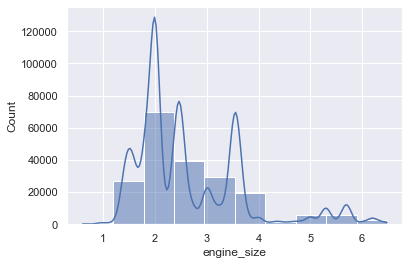

In [25]:
# exploring the PDF for 'engine_size'
sns.histplot(data_3['engine_size'],bins = 10,kde = True )

plt.show()

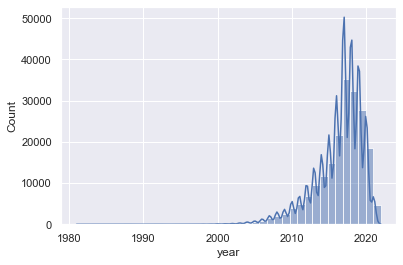

In [26]:
# exploring the PDF for 'year'
sns.histplot(data_3['year'],bins =40,kde = True)

plt.show()

In [27]:
#Removig Bottom 1% of 'year'
q = data_3['year'].quantile(0.01)
data_4 = data_3[data_3['year']>q]
data_4.describe(include = 'all')

,price,miles,year,make,vehicle_type,drivetrain,transmission,engine_size,engine_block,fuel
count,197979.000000,197979.000000,197979.000000,197979,197979,197979,197979,197979.000000,197979,197979
unique,NaN,NaN,NaN,51,2,3,2,NaN,3,4
top,NaN,NaN,NaN,Ford,Truck,4WD,Automatic,NaN,I,Gas
freq,NaN,NaN,NaN,18196,122882,123708,183765,NaN,142672,190790
mean,24225.493739,74875.608340,2016.458857,NaN,NaN,NaN,NaN,2.625041,NaN,NaN
std,13988.262949,50950.450666,2.908304,NaN,NaN,NaN,NaN,1.067954,NaN,NaN
min,1100.000000,0.000000,2007.000000,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
25%,13999.000000,37000.000000,2015.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
50%,20995.000000,64690.000000,2017.000000,NaN,NaN,NaN,NaN,2.400000,NaN,NaN
75%,30900.000000,104459.500000,2019.000000,NaN,NaN,NaN,NaN,3.432394,NaN,NaN


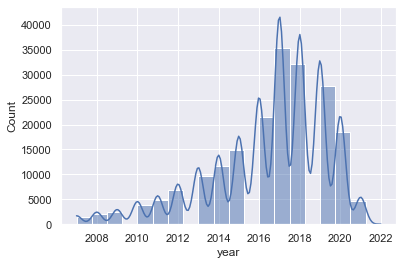

In [28]:
# exploring the PDF for 'year'
sns.histplot(data_4['year'],bins =20,kde = True)

plt.show()

In [29]:
data_cleaned = data_4.reset_index(drop=True)

## Checking the OLS assumptions

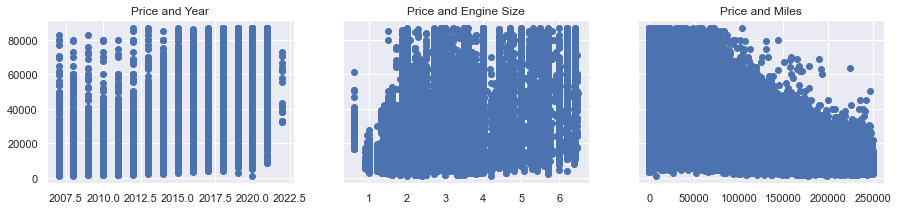

In [30]:
# Ploting 'year', 'engine_size' and 'miles' Vs 'price'
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['year'],data_cleaned['price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['engine_size'],data_cleaned['price'])
ax2.set_title('Price and Engine Size')
ax3.scatter(data_cleaned['miles'],data_cleaned['price'])
ax3.set_title('Price and Miles')


plt.show()

In [31]:
# while 'price' seems exponintailly distributed we transform it log transformation
#transform 'Price' with a log transformation
log_price = np.log(data_cleaned['price'])


#add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned.head()

,price,miles,year,make,vehicle_type,drivetrain,transmission,engine_size,engine_block,fuel,log_price
0,3499.0,174850.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,8.160232
1,5200.0,89124.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,8.556414
2,4789.0,151745.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,8.474077
3,5995.0,176631.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,8.698681
4,2950.0,239884.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,7.989560


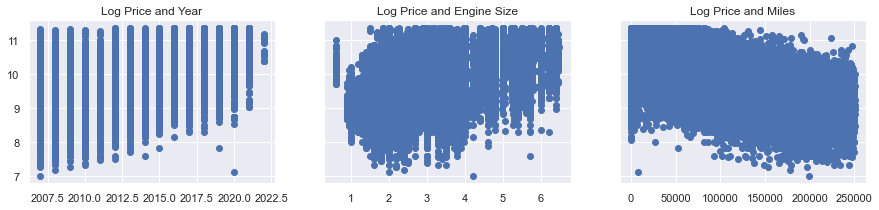

In [32]:
# Ploting 'year', 'engine_size' and 'miles' Vs 'log_price'

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['engine_size'],data_cleaned['log_price'])
ax2.set_title('Log Price and Engine Size')
ax3.scatter(data_cleaned['miles'],data_cleaned['log_price'])
ax3.set_title('Log Price and Miles')


plt.show()

In [33]:
#Droping 'price' column
data_cleaned = data_cleaned.drop(['price'],axis=1)

In [34]:
data_cleaned.head()

,miles,year,make,vehicle_type,drivetrain,transmission,engine_size,engine_block,fuel,log_price
0,174850.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,8.160232
1,89124.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,8.556414
2,151745.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,8.474077
3,176631.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,8.698681
4,239884.0,2008.0,Dodge,Car,FWD,Automatic,2.7,V,Gas,7.989560


#### Multicollinearity

In [35]:
# importing the module from statmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['miles','year','engine_size']]

# calculating the VIF the variables
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [36]:
vif

,VIF,Features
0,3.207437,miles
1,8.350798,year
2,7.167126,engine_size


## Creating Dummy Variables 

In [37]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies.head()

,miles,year,engine_size,log_price,make_Alfa Romeo,make_Am General,make_Aston Martin,make_Audi,make_BMW,make_Bentley,...,make_smart,vehicle_type_Truck,drivetrain_FWD,drivetrain_RWD,transmission_Manual,engine_block_I,engine_block_V,fuel_Electric,fuel_Gas,fuel_Hybrid
0,174850.0,2008.0,2.7,8.160232,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,89124.0,2008.0,2.7,8.556414,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,151745.0,2008.0,2.7,8.474077,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,176631.0,2008.0,2.7,8.698681,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,239884.0,2008.0,2.7,7.989560,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [38]:
data_with_dummies.columns.values

array(['miles', 'year', 'engine_size', 'log_price', 'make_Alfa Romeo',
       'make_Am General', 'make_Aston Martin', 'make_Audi', 'make_BMW',
       'make_Bentley', 'make_Buick', 'make_Cadillac', 'make_Chevrolet',
       'make_Chrysler', 'make_Dodge', 'make_Eagle', 'make_FIAT',
       'make_Ferrari', 'make_Ford', 'make_GENESIS', 'make_GMC',
       'make_Honda', 'make_Hummer', 'make_Hyundai', 'make_INFINITI',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_KARMA', 'make_Kia',
       'make_Land Rover', 'make_Lexus', 'make_Lincoln', 'make_Lotus',
       'make_MINI', 'make_Maserati', 'make_Mazda', 'make_Mercedes-Benz',
       'make_Mercury', 'make_Mitsubishi', 'make_Nissan', 'make_Pontiac',
       'make_Porsche', 'make_RAM', 'make_Saab', 'make_Saturn',
       'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Tesla',
       'make_Toyota', 'make_Volkswagen', 'make_Volvo', 'make_smart',
       'vehicle_type_Truck', 'drivetrain_FWD', 'drivetrain_RWD',
       'transmission_Manual', 'eng

In [39]:
#rearrange columns 
cols=['log_price','miles', 'year', 'engine_size',  'make_Alfa Romeo',
       'make_Am General', 'make_Aston Martin', 'make_Audi', 'make_BMW',
       'make_Bentley', 'make_Buick', 'make_Cadillac', 'make_Chevrolet',
       'make_Chrysler', 'make_Dodge', 'make_Eagle', 'make_FIAT',
       'make_Ferrari', 'make_Ford', 'make_GENESIS', 'make_GMC',
       'make_Honda', 'make_Hummer', 'make_Hyundai', 'make_INFINITI',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_KARMA', 'make_Kia',
       'make_Land Rover', 'make_Lexus', 'make_Lincoln', 'make_Lotus',
       'make_MINI', 'make_Maserati', 'make_Mazda', 'make_Mercedes-Benz',
       'make_Mercury', 'make_Mitsubishi', 'make_Nissan', 'make_Pontiac',
       'make_Porsche', 'make_RAM', 'make_Saab', 'make_Saturn',
       'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Tesla',
       'make_Toyota', 'make_Volkswagen', 'make_Volvo', 'make_smart',
       'vehicle_type_Truck', 'drivetrain_FWD', 'drivetrain_RWD',
       'transmission_Manual', 'engine_block_I', 'engine_block_V',
       'fuel_Electric', 'fuel_Gas', 'fuel_Hybrid']

data_preprocessed = data_with_dummies[cols].reset_index(drop= True)
data_preprocessed.head()

,log_price,miles,year,engine_size,make_Alfa Romeo,make_Am General,make_Aston Martin,make_Audi,make_BMW,make_Bentley,...,make_smart,vehicle_type_Truck,drivetrain_FWD,drivetrain_RWD,transmission_Manual,engine_block_I,engine_block_V,fuel_Electric,fuel_Gas,fuel_Hybrid
0,8.160232,174850.0,2008.0,2.7,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,8.556414,89124.0,2008.0,2.7,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,8.474077,151745.0,2008.0,2.7,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,8.698681,176631.0,2008.0,2.7,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,7.989560,239884.0,2008.0,2.7,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


##### The benchmarks :
Brand: Acura \
Vehicle type : Car \
Drivetrain : 4WD \
Engine Block : H \
Fuel : Desiel

## Linear Regression Model

### Declare the inputs and the targets

In [40]:
# The target (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [41]:
targets.describe()

count    197979.000000
mean          9.931610
std           0.589250
min           7.003065
25%           9.546741
50%           9.952040
75%          10.338511
max          11.373606
Name: log_price, dtype: float64

### Scale the data

In [42]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [43]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [44]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 100
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=100)

### Create the regression

In [45]:
# Create a linear regression object
reg = LinearRegression()

# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [46]:
# Check the outputs of the regression
# store them in y_hat
y_hat = reg.predict(x_train)

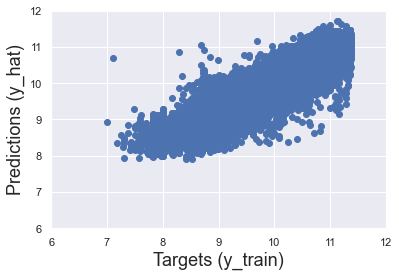

In [47]:
#Ploting the Targets vs Predictions
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
 
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

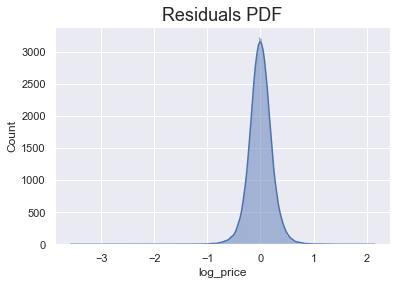

In [48]:
# check model by checking the normalty of residuals
sns.histplot(y_train - y_hat, kde = True)

# Include a title
plt.title("Residuals PDF", size=18)

In [49]:
#R-Square value
reg.score(x_train,y_train)


0.8618098040794494

### Finding the weights and bias

In [50]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.931769464680674

In [51]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([-1.43881073e-01,  2.99373863e-01,  2.05482271e-01,  1.05820065e-02,
        2.29338391e-03,  8.40979767e-03,  4.57233907e-02,  5.74734356e-02,
        1.17641571e-02, -9.08677794e-03,  3.13486557e-03, -3.64694281e-02,
       -2.22283871e-02, -6.44165296e-02,  4.08069308e-03, -9.61727877e-03,
        4.66655829e-04, -2.07174853e-02,  3.19854178e-03, -1.86660893e-02,
        3.64894449e-04,  6.10304393e-03, -5.64897793e-02, -2.10345643e-03,
        6.81272893e-03,  2.34709745e-02, -1.44064765e-02,  2.09849706e-01,
       -5.71392418e-02,  3.45473442e-02,  2.20011665e-02,  6.41848540e-03,
        4.14434420e-03,  1.00008728e-02,  1.78568673e-02, -3.94363407e-02,
        5.78513341e-02, -2.40761889e-04, -3.39796523e-02, -6.58958718e-02,
       -6.51721307e-03,  3.32536091e-02, -3.39063956e-02,  1.30166876e-03,
       -2.74771660e-03, -6.29892457e-03, -2.52726561e-02, -1.39987721e-02,
        2.51284948e-02, -1.08295796e-02, -4.13210977e-03,  2.67761289e-02,
       -1.90859440e-02,  

In [52]:
pd.options.display.max_rows = 99

# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,miles,-0.143881
1,year,0.299374
2,engine_size,0.205482
3,make_Alfa Romeo,0.010582
4,make_Am General,0.002293
5,make_Aston Martin,0.008410
6,make_Audi,0.045723
7,make_BMW,0.057473
8,make_Bentley,0.011764
9,make_Buick,-0.009087


### Testing

In [53]:
y_hat_test = reg.predict(x_test)

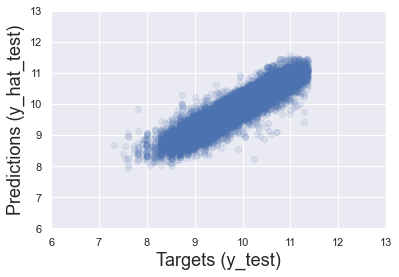

In [54]:
# A scatter plot with the test targets and the test predictions
#The argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.1)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [55]:
#check the predictions manually

# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10975.601450
1,39780.348666
2,24332.513427
3,13681.491493
4,11656.077101


In [56]:
# We can also include the test targets in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10975.601450,8999.0
1,39780.348666,46888.0
2,24332.513427,23894.0
3,13681.491493,9998.0
4,11656.077101,9795.0
...,...,...
39591,20157.599166,24999.0
39592,24486.738570,18284.0
39593,39879.524912,42900.0
39594,16119.600762,17996.0


In [57]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [58]:
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10975.601450,8999.0,-1976.601450,21.964679
1,39780.348666,46888.0,7107.651334,15.158785
2,24332.513427,23894.0,-438.513427,1.835245
3,13681.491493,9998.0,-3683.491493,36.842283
4,11656.077101,9795.0,-1861.077101,19.000277
...,...,...,...,...
39591,20157.599166,24999.0,4841.400834,19.366378
39592,24486.738570,18284.0,-6202.738570,33.924407
39593,39879.524912,42900.0,3020.475088,7.040734
39594,16119.600762,17996.0,1876.399238,10.426757


In [59]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,3.959600e+04,39596.000000,3.959600e+04,3.959600e+04
mean,3.588171e+40,24286.795358,-3.588171e+40,4.485494e+37
std,7.140009e+42,14052.960146,7.140009e+42,8.925569e+39
min,2.778458e+03,1500.000000,-1.420772e+45,1.059472e-04
25%,1.443109e+04,13998.000000,-2.348578e+03,5.954785e+00
50%,2.095550e+04,20995.000000,-1.182251e+01,1.269590e+01
75%,3.020906e+04,30994.250000,2.705965e+03,2.221566e+01
max,1.420772e+45,86995.000000,6.680635e+04,1.776076e+42


In [60]:
# Sometimes it is useful to check these outputs manually
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
13068,14795.98,14796.00,0.02,0.00
6167,20550.56,20550.00,-0.56,0.00
19734,20989.42,20990.00,0.58,0.00
27653,8999.36,8999.00,-0.36,0.00
6493,16998.30,16999.00,0.70,0.00
...,...,...,...,...
14794,5937.62,1500.00,-4437.62,295.84
6868,8648.22,1999.00,-6649.22,332.63
17224,29276.95,6211.00,-23065.95,371.37
1219,18920.49,2500.00,-16420.49,656.82
